# 確率と統計の入門  
このノートブックでは、これまでに議論したいくつかの概念を試してみます。確率と統計の多くの概念は、Pythonのデータ処理用主要ライブラリである`numpy`や`pandas`でよく表現されています。


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## 確率変数と分布
まず、0から9までの一様分布から30個の値をサンプリングしてみましょう。また、平均と分散も計算します。


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


サンプルにどれくらい異なる値があるかを視覚的に推定するために、**ヒストグラム**をプロットすることができます。


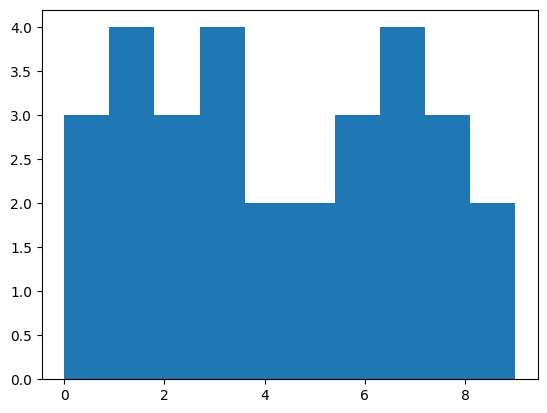

In [119]:
plt.hist(sample)
plt.show()

## 実データの分析

平均と分散は、実世界のデータを分析する際に非常に重要です。野球選手に関するデータを [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights) から読み込みましょう。


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


> ここではデータ分析のために [**Pandas**](https://pandas.pydata.org/) というパッケージを使用しています。このコースの後半で、PandasやPythonでのデータ操作についてさらに詳しく説明します。

年齢、身長、体重の平均値を計算してみましょう:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

では、高さに注目し、標準偏差と分散を計算しましょう：


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


平均値に加えて、中央値や四分位数を確認するのも理にかなっています。それらは**箱ひげ図**を使用して視覚化できます。


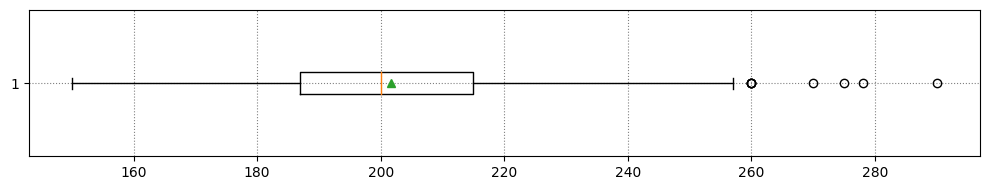

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

私たちは、例えばプレイヤーの役割ごとにグループ化するなどして、データセットのサブセットの箱ひげ図を作成することもできます。


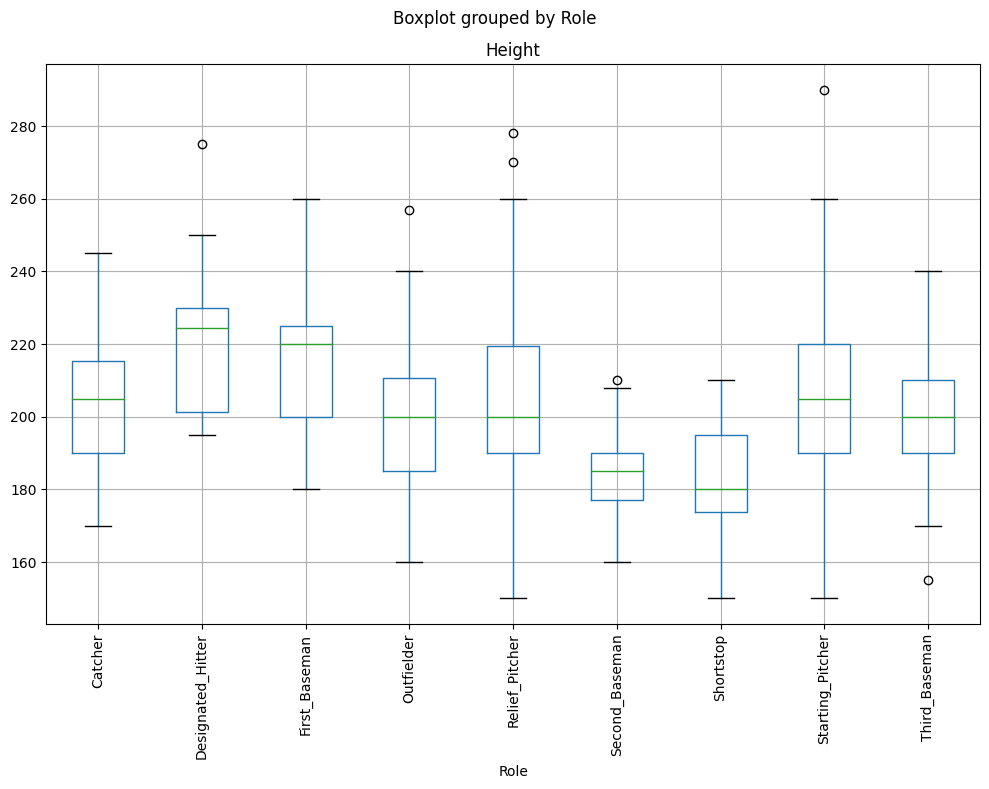

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Note**: この図は、平均的に一塁手の身長が二塁手の身長よりも高いことを示唆しています。後ほど、この仮説をより正式に検証する方法や、データが統計的に有意であることを示す方法について学びます。

年齢、身長、体重はすべて連続型の確率変数です。それらの分布はどのような形だと思いますか？調べる良い方法は、値のヒストグラムをプロットすることです。


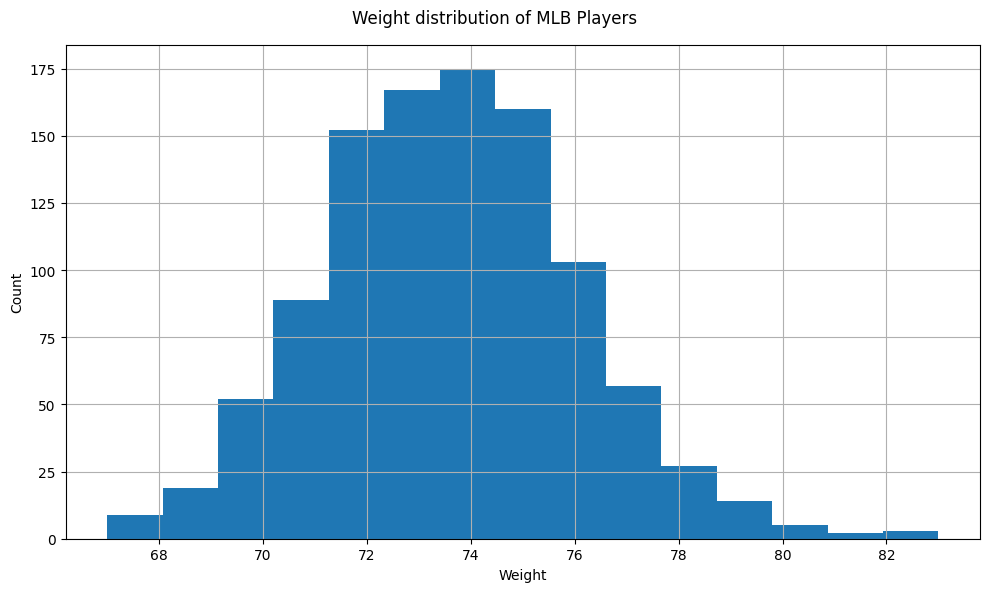

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 正規分布

実際のデータと同じ平均値と分散を持つ正規分布に従う人工的な体重サンプルを作成してみましょう:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

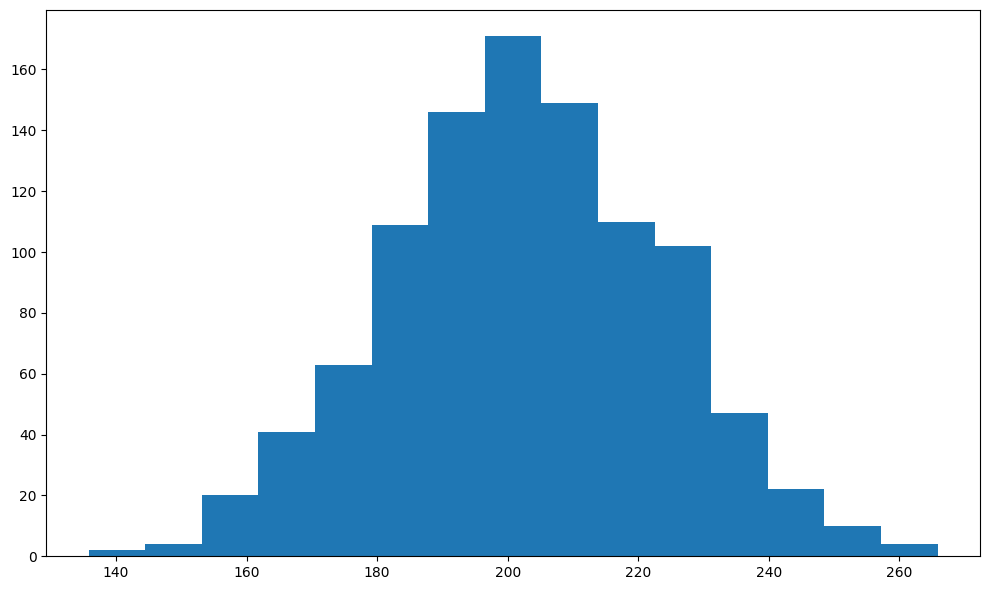

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

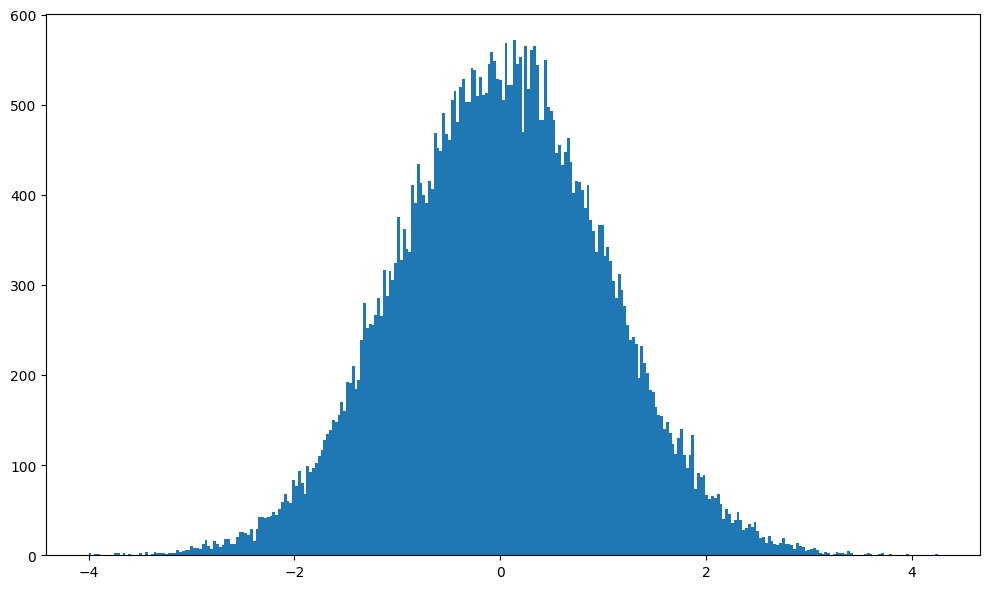

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

実生活のほとんどの値は正規分布しているため、サンプルデータを生成する際に一様乱数生成器を使用すべきではありません。一様分布（`np.random.rand`によって生成される）を使用して体重を生成しようとすると、次のようなことが起こります：


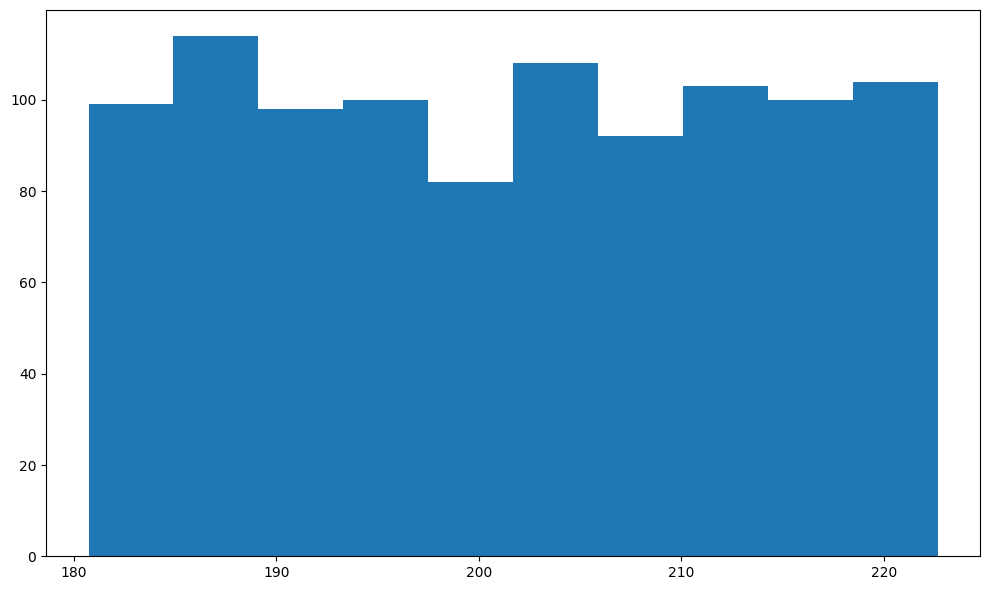

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## 信頼区間

次に、野球選手の体重と身長の信頼区間を計算してみましょう。このコードは[このStack Overflowの議論](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data)から引用しています。


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## 仮説検定

野球選手のデータセットで異なる役割を見てみましょう:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


私たちは、区間が重ならないことを確認できます。

仮説を証明するための統計的により正確な方法は、**スチューデントのt検定**を使用することです：


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


`ttest_ind` 関数によって返される2つの値は以下の通りです：
* p値は、2つの分布が同じ平均を持つ確率と考えることができます。今回の場合、p値は非常に低く、これにより一塁手が背が高いという強い証拠が示されています。
* t値は、t検定で使用される正規化された平均差の中間値であり、指定された信頼値に対する閾値と比較されます。


## 中心極限定理を使った正規分布のシミュレーション

Pythonの疑似乱数生成器は、一様分布を生成するように設計されています。正規分布の生成器を作成したい場合、中心極限定理を利用することができます。正規分布に従う値を得るには、一様分布で生成されたサンプルの平均を計算するだけです。


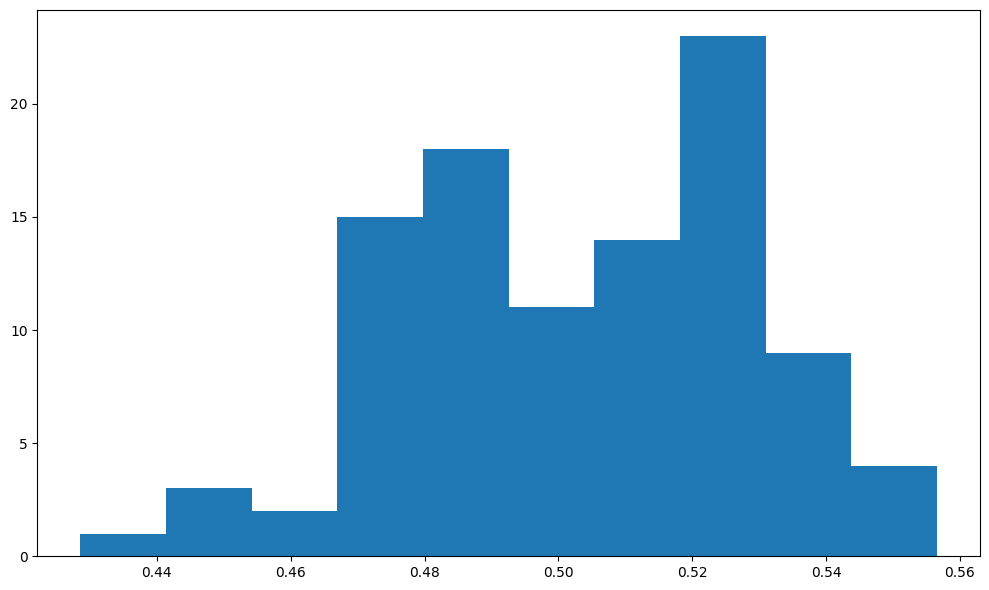

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## 相関と悪の野球企業

相関を利用すると、データの並びの間にある関係を見つけることができます。このおもちゃの例では、悪の野球企業が選手の身長に応じて給料を支払うと仮定してみましょう。選手が背が高いほど、より多くのお金をもらえる仕組みです。基本給は$1000で、身長に応じて$0から$100のボーナスが追加されるとします。ここでは、MLBの実際の選手を使い、彼らの仮想的な給料を計算してみましょう。


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


これらのシーケンスの共分散と相関を計算してみましょう。`np.cov`は、いわゆる**共分散行列**を提供します。これは、共分散を複数の変数に拡張したものです。共分散行列$M$の要素$M_{ij}$は、入力変数$X_i$と$X_j$の間の相関を表し、対角成分$M_{ii}$は$X_{i}$の分散を表します。同様に、`np.corrcoef`は**相関行列**を提供します。


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


相関が1に等しいということは、2つの変数の間に強い**線形関係**があることを意味します。一方の値をもう一方の値に対してプロットすることで、線形関係を視覚的に確認できます。


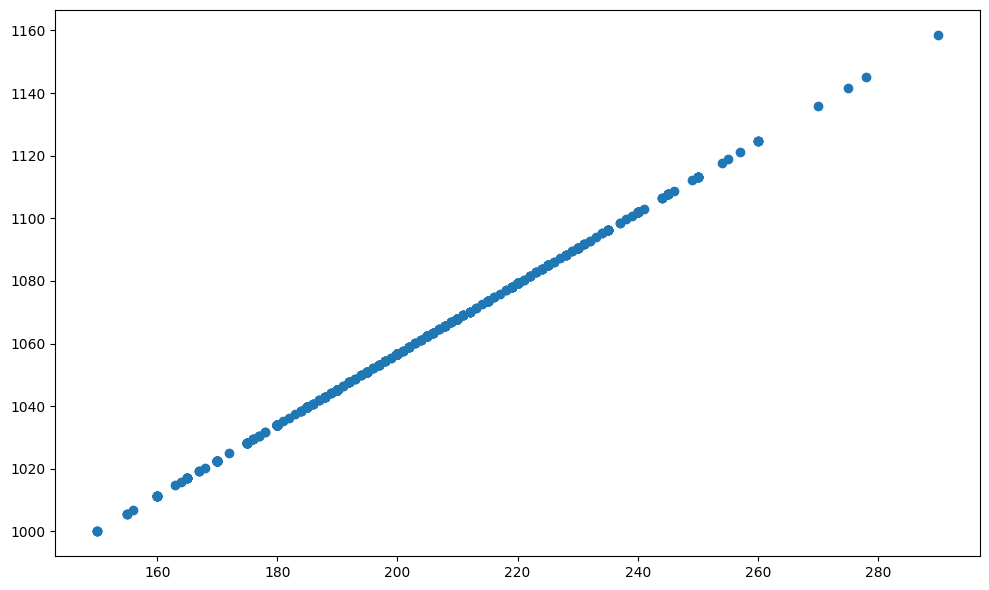

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

高さと給与の間の明らかな線形依存関係を隠すことを決定し、`sin`のような非線形性を式に導入したと仮定しましょう。


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


この場合、相関はやや小さくなりますが、それでもかなり高いです。さて、関係をさらに目立たなくするために、給与にいくつかのランダムな変数を追加して、追加のランダム性を加えたいと思います。何が起こるか見てみましょう:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


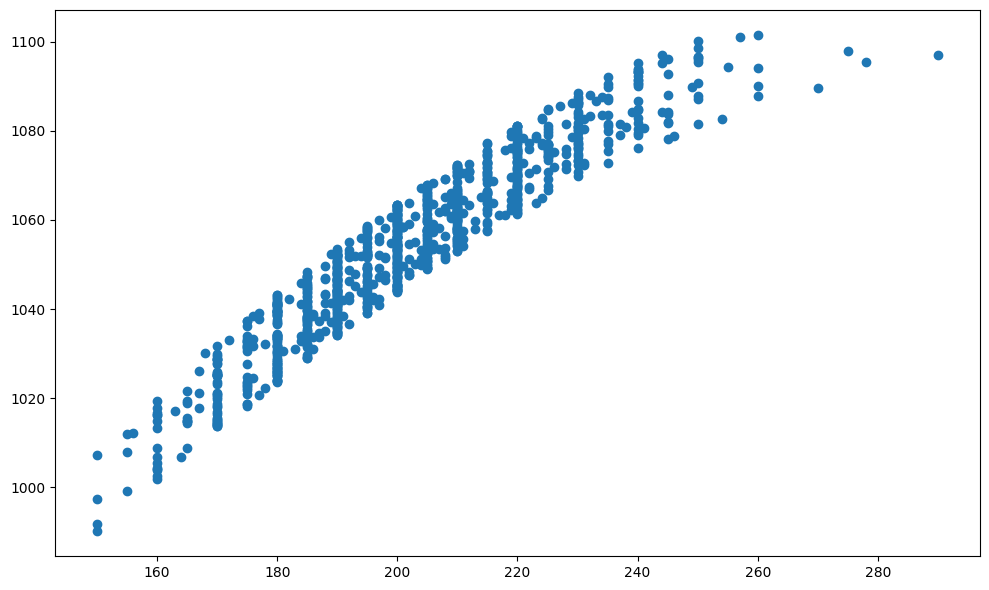

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> なぜドットがこのように縦の線に並ぶのか、わかりますか？

私たちは、給与のような人工的に作られた概念と観測された変数 *身長* の間の相関を確認しました。それでは、身長と体重のような2つの観測された変数が相関するかどうかも見てみましょう:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

残念ながら、結果は得られず、奇妙な `nan` 値だけが表示されました。これは、シリーズ内のいくつかの値が未定義であり、それが `nan` として表されているためです。その結果、操作の結果も未定義となります。マトリックスを確認すると、`Weight` が問題のある列であることが分かります。なぜなら、`Height` 値間の自己相関は計算されているからです。

> この例は、**データの準備**と**クリーニング**の重要性を示しています。適切なデータがなければ、何も計算することはできません。

`fillna` メソッドを使用して欠損値を埋め、相関を計算してみましょう。


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

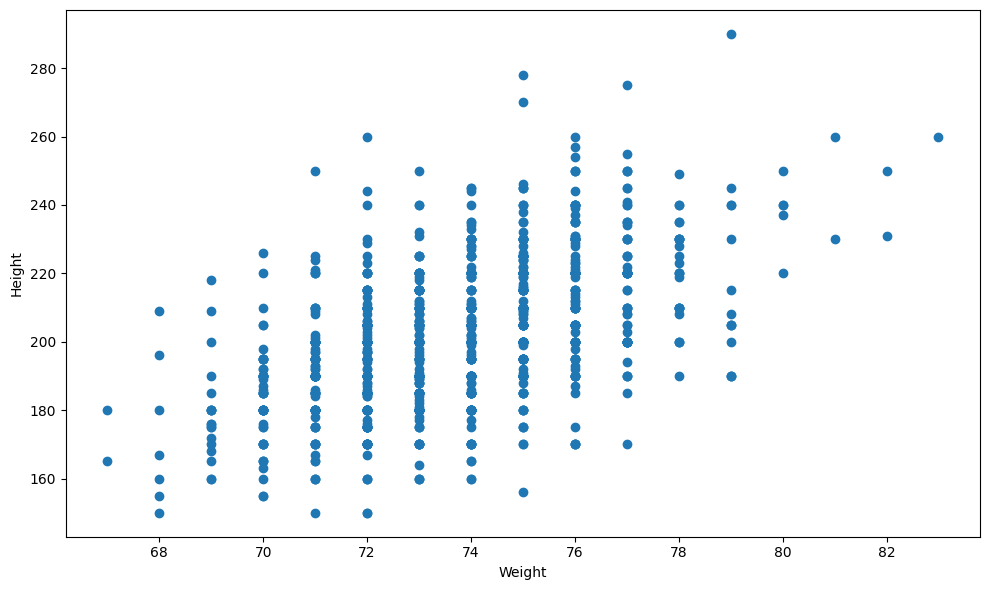

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## 結論

このノートブックでは、データに対して基本的な操作を行い、統計関数を計算する方法を学びました。数学と統計の適切な手法を使用して仮説を証明する方法や、データサンプルを基に任意の変数の信頼区間を計算する方法を理解しました。



---

**免責事項**:  
この文書は、AI翻訳サービス [Co-op Translator](https://github.com/Azure/co-op-translator) を使用して翻訳されています。正確性を期すよう努めておりますが、自動翻訳には誤りや不正確な表現が含まれる可能性があります。元の言語で記載された原文を公式な情報源としてご参照ください。重要な情報については、専門の人間による翻訳を推奨します。本翻訳の利用に起因する誤解や誤認について、当社は一切の責任を負いません。
